In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Enrique's code starts here

In [2]:
# read in the data
employment_data = pd.read_csv("Resources/Average annual hours actually worked.csv")
happiness_data = pd.read_csv("Resources/World Happiness Report 2018.csv")

In [ ]:
# clean up employment_data

# get only relevant rows
employment_data = employment_data[["Country", "Employment status", "Time", "Value"]]

# get only total employment
total_employment = employment_data.loc[employment_data["Employment status"] == "Total employment"]

# get only 2018 data
total_employment_2018 = total_employment.loc[total_employment["Time"] == 2018]

# sort by country
total_employment_2018 = total_employment_2018.sort_values(by="Country")

# rename columns and get a final dataframe
total_employment_2018 = total_employment_2018[["Country", "Value"]]
total_employment_2018 = total_employment_2018.rename(columns={"Value": "Avg Hours Worked per Worker"})

In [3]:
# clean up happiness_data

# rename country column for merging
happiness_data = happiness_data.rename(columns={"Country or region": "Country"})

In [ ]:
# merge happiness data into the employment data
data = pd.merge(total_employment_2018, happiness_data, how="left", on="Country")

# clean up merged data
data = data.dropna()

In [ ]:
# Plot Average Number of Hours Worked per Worker by Country

# countries list and tick locations
countries = data["Country"].tolist()
tick_locations = np.arange(len(countries))

# dataframe for plot
hours_worked = data[["Country", "Avg Hours Worked per Worker"]]

# plot the data
hours_worked.plot(kind="bar", legend=False, width=.8)

# assign xticks
plt.xticks(tick_locations, countries, rotation=90)

# title and labels
plt.title(f"Average Number of Hours Worked\n"
          f"per Worker by Country (2018)")
plt.xlabel("Country")
plt.ylabel("Number of Hours")

print(len(countries))
# display plot
plt.tight_layout()
plt.show()

In [ ]:
# Regression Analysis for Question #1
# Hypothesis: Countries with lower working hours will tend to have a higher happiness score.

# define independent and dependent variables
independent_variable = "Avg Hours Worked per Worker"
dependent_variable = "Score"

# define title and labels
xlabel = "Number of Hours Worked"
ylabel = "Happiness Score"
title = f"{ylabel} vs. {xlabel}"

# create dataframe
hours_and_happiness = data[["Country", independent_variable, dependent_variable]]

# define x and y values
x_values = hours_and_happiness[independent_variable]
y_values = hours_and_happiness[dependent_variable]

# run regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression values
regress_values = x_values * slope + intercept

# create line equation
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 2)}"

# plot the data
plt.scatter(x_values, y_values)

# plot the regression line
plt.plot(x_values, regress_values, "r-")

# add equation
plt.annotate(line_eq, (1780, 5.8), fontsize=15, color="red")

# add title and labels to plot
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# print summary data
print(f"The r-squared value is: {round(rvalue**2, 2)}")
print(f"The p-value is: {round(pvalue, 2)}")

# display the plot
plt.show()

### Enrique's code ends here

## Jake's code starts here

In [10]:
#read in ILO data

ilo_data = pd.read_csv("Resources/ILOSTAT.csv")

#merge data frames
#You need to run Enrique's code before this cell to create happiness_data and rename the country column
ilo_happiness_df = pd.merge(ilo_data, happiness_data, on="Country")




ilo_happiness_df.head()

,Group,Country,Time,Extremely poor,Moderately poor,Near poor,Developing middle class and above,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Low income countries,Afghanistan,2018,37.61,32.71,17.57,12.11,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,Low income countries,Benin,2018,42.26,27.12,16.77,13.85,136,4.141,0.378,0.372,0.240,0.440,0.163,0.067
2,Low income countries,Burkina Faso,2018,37.66,33.42,17.68,11.24,121,4.424,0.314,1.097,0.254,0.312,0.175,0.128
3,Low income countries,Burundi,2018,71.98,17.56,7.64,2.83,156,2.905,0.091,0.627,0.145,0.065,0.149,0.076
4,Low income countries,Central African Republic,2018,69.96,15.86,9.34,4.85,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [15]:
#separate countries into income groups
low_income = ilo_happiness_df[ilo_happiness_df["Group"] == "Low income countries"]
low_mid_income = ilo_happiness_df[ilo_happiness_df["Group"] == "Lower-middle income countries"]
up_mid_income = ilo_happiness_df[ilo_happiness_df["Group"] == "Upper-middle income countries"]
high_income = ilo_happiness_df[ilo_happiness_df["Group"] == "High income countries"]

#calculate mean happiness score for each income group
low_income_happiness = low_income["Score"].mean()
low_mid_income_happiness = low_mid_income["Score"].mean()
up_mid_income_happiness = up_mid_income["Score"].mean()
high_income_happiness = high_income["Score"].mean()

#create dataframe with income groups and their mean happiness score
happiness_groups = pd.DataFrame({"Income Group": ["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"],
                                "Average Happiness Score": [low_income_happiness, low_mid_income_happiness, up_mid_income_happiness, high_income_happiness]})

happiness_groups

,Income Group,Average Happiness Score
0,Low Income,4.045840
1,Lower-Middle Income,4.845633
2,Upper-Middle Income,5.480588
3,High Income,6.402000


<BarContainer object of 4 artists>

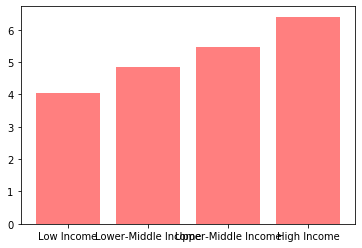

In [18]:
plt.bar(happiness_groups["Income Group"], happiness_groups["Average Happiness Score"], color='r', alpha=0.5, align="center")

### Jake's code ends here

## Yee's code starts here

### Yee's code ends here